# Lesson 3: Agentic Search

In [1]:
# libraries
from dotenv import load_dotenv
import os
from tavily import TavilyClient

# load environment variables from .env file
_ = load_dotenv()

# connect
client = TavilyClient(api_key=os.environ.get("TAVILY_API_KEY"))

In [2]:
# run search
result = client.search("What is in Nvidia's new Blackwell GPU?",
                       include_answer=True)

# print the answer
result["answer"]


"The Blackwell GPU features 208 billion transistors and supports GDDR7 and HBM3e memory. It uses TSMC's 4NP and 4N processes for datacenter and consumer versions. It offers up to 20 petaflops of FP4 performance."

## Regular search

In [3]:
# choose location (try to change to your own city!)

city = "San Francisco"

query = f"""
    what is the current weather in {city}?
    Should I travel there today?
    "weather.com"
"""

> Note: search was modified to return expected results in the event of an exception. High volumes of student traffic sometimes cause rate limit exceptions.

In [4]:
import requests
from bs4 import BeautifulSoup
from duckduckgo_search import DDGS
import re

ddg = DDGS()

def search(query, max_results=6):
    try:
        results = ddg.text(query, max_results=max_results)
        return [i["href"] for i in results]
    except Exception as e:
        print(f"returning previous results due to exception reaching ddg.")
        results = [ # cover case where DDG rate limits due to high deeplearning.ai volume
            "https://weather.com/weather/today/l/USCA0987:1:US",
            "https://weather.com/weather/hourbyhour/l/54f9d8baac32496f6b5497b4bf7a277c3e2e6cc5625de69680e6169e7e38e9a8",
        ]
        return results  


for i in search(query):
    print(i)

returning previous results due to exception reaching ddg.
https://weather.com/weather/today/l/USCA0987:1:US
https://weather.com/weather/hourbyhour/l/54f9d8baac32496f6b5497b4bf7a277c3e2e6cc5625de69680e6169e7e38e9a8


In [5]:
def scrape_weather_info(url):
    """Scrape content from the given URL"""
    if not url:
        return "Weather information could not be found."
    
    # fetch data
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the webpage."

    # parse result
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


> Note: This produces a long output, you may want to right click and clear the cell output after you look at it briefly to avoid scrolling past it.

In [6]:
# use DuckDuckGo to find websites and take the first result
url = search(query)[0]

# scrape first wesbsite
soup = scrape_weather_info(url)

print(f"Website: {url}\n\n")
print(str(soup.body)[:50000]) # limit long outputs

returning previous results due to exception reaching ddg.
Website: https://weather.com/weather/today/l/USCA0987:1:US


<body><div class="appWrapper DaybreakLargeScreen LargeScreen lightTheme twcTheme DaybreakLargeScreen--appWrapper--ZkDop gradients--clearNight--cs6t9 gradients--clearNight-top--SVtBt" id="appWrapper"><div class="region-meta"><div class="removeIfEmpty" id="WxuHtmlHead-meta-"></div><div class="removeIfEmpty" id="WxuNewsroom-meta-bc9f40d5-d941-4fd8-bae2-2d8d63a38bb3"></div></div><div class="regionHeaderWrapper DaybreakLargeScreen--stickyHeader--0Pgu8"><div class="regionHeaderInnerWrapper"><div class="adsSectionOuterWrapper"><div class="adsSectionInnerWrapper"><div class="js-branded-background-ads" id="labBG"></div><div class="js-branded-background-ads" id="wx-hero-content"></div><div class="region-stickyAds regionStickyAds"><div class="removeIfEmpty" id="WxuAd-stickyAds-50b69813-b340-4d89-a22d-016d4b682491"><div class="adWrapper BaseAd--adWrapper--ANZ1O BaseAd--hide--hCG8L

In [7]:
# extract text
weather_data = []
for tag in soup.find_all(['h1', 'h2', 'h3', 'p']):
    text = tag.get_text(" ", strip=True)
    weather_data.append(text)

# combine all elements into a single string
weather_data = "\n".join(weather_data)

# remove all spaces from the combined text
weather_data = re.sub(r'\s+', ' ', weather_data)
    
print(f"Website: {url}\n\n")
print(weather_data)

Website: https://weather.com/weather/today/l/USCA0987:1:US


recents Menu Weather Forecasts Radar & Maps News & Media Products & Account Lifestyle Specialty Forecasts San Francisco, CA Weather Today in San Francisco, CA 5:49 am 8:36 pm Morning Afternoon Evening Overnight Don't Miss Hourly Forecast Now 3 am 4 am 5 am 6 am Seasonal Hub Trending Now Daily Forecast Today Sat 28 Sun 29 Mon 30 Tue 01 Radar We Love Our Critters Get Your Skin Ready For Summer Home, Garage & Garden Now You See It... Keeping You Healthy Product Reviews & Deals Prep For Hurricane Season With These Generator Sales 16 Popular Long Sleeve Sun Shirts For Men And Women Dehumidifier Guide: How It Works And Our Top Picks Best Sunscreen Of 2025: Our Top 10 Picks Happening Near San Francisco, CA Popular Nextdoor posts Stay Safe Heat Anxiety Is Real Air Quality Index Air quality is considered satisfactory, and air pollution poses little or no risk. Health & Activities Seasonal Allergies and Pollen Count Forecast Grass poll

## Agentic Search

In [8]:
# run search
result = client.search(query, max_results=1)

# print first result
data = result["results"][0]["content"]

print(data)

{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.775, 'lon': -122.4183, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1751015842, 'localtime': '2025-06-27 02:17'}, 'current': {'last_updated_epoch': 1751015700, 'last_updated': '2025-06-27 02:15', 'temp_c': 13.3, 'temp_f': 55.9, 'is_day': 0, 'condition': {'text': 'Fog', 'icon': '//cdn.weatherapi.com/weather/64x64/night/248.png', 'code': 1135}, 'wind_mph': 8.1, 'wind_kph': 13.0, 'wind_degree': 216, 'wind_dir': 'SW', 'pressure_mb': 1013.0, 'pressure_in': 29.92, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 87, 'cloud': 25, 'feelslike_c': 12.2, 'feelslike_f': 54.0, 'windchill_c': 10.4, 'windchill_f': 50.7, 'heatindex_c': 11.3, 'heatindex_f': 52.3, 'dewpoint_c': 10.8, 'dewpoint_f': 51.4, 'vis_km': 16.0, 'vis_miles': 9.0, 'uv': 0.0, 'gust_mph': 11.7, 'gust_kph': 18.8}}


In [9]:
import json
from pygments import highlight, lexers, formatters

# parse JSON
parsed_json = json.loads(data.replace("'", '"'))

# pretty print JSON with syntax highlighting
formatted_json = json.dumps(parsed_json, indent=4)
colorful_json = highlight(formatted_json,
                          lexers.JsonLexer(),
                          formatters.TerminalFormatter())

print(colorful_json)


{
    "location": {
        "name": "San Francisco",
        "region": "California",
        "country": "United States of America",
        "lat": 37.775,
        "lon": -122.4183,
        "tz_id": "America/Los_Angeles",
        "localtime_epoch": 1751015842,
        "localtime": "2025-06-27 02:17"
    },
    "current": {
        "last_updated_epoch": 1751015700,
        "last_updated": "2025-06-27 02:15",
        "temp_c": 13.3,
        "temp_f": 55.9,
        "is_day": 0,
        "condition": {
            "text": "Fog",
            "icon": "//cdn.weatherapi.com/weather/64x64/night/248.png",
            "code": 1135
        },
        "wind_mph": 8.1,
        "wind_kph": 13.0,
        "wind_degree": 216,
        "wind_dir": "SW",
        "pressure_mb": 1013.0,
        "pressure_in": 29.92,
        "precip_mm": 0.0,
        "precip_in": 0.0,
        "humidity": 87,
        "cloud": 25,
        "feelslike_c": 12.2,
        "feelslike_f": 54.0,
        "windchill_c": 10.4,
        "wind

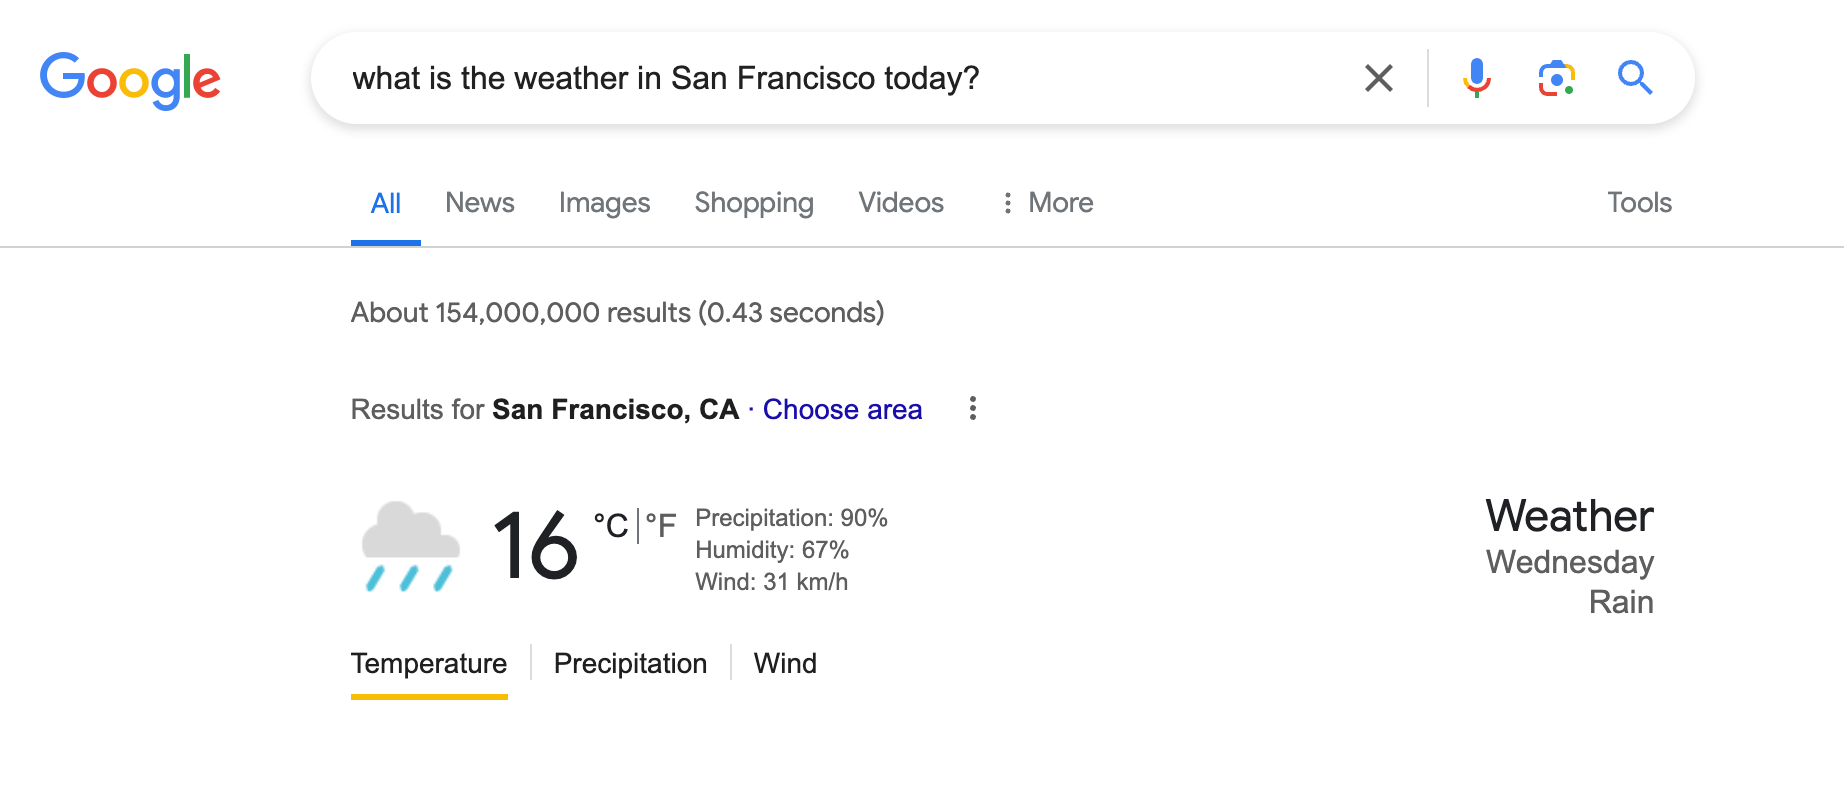